# Clustering

In this notebook, we will practice the two most popular clustering algorithms: k-Means, DBSCAN, and Gaussian Mixture Model (GMM).

All three algorithms are implemented in the [Scikit-Learn](https://scikit-learn.org/stable/) python package.


In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs #to upload data

We will generate 1500 isotropic Gaussian blobs for clustering ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). We will create four datasets to practice the k-means algorithm.

In [2]:
n_samples = 1500
random_state = 170
# three gaussian blobs
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# Different variance
X_varied, _ = make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
# Mouse data
X_mouse, _ = make_blobs(n_samples=n_samples,centers=[[0, 0], [-1.5, 2], [1.5, 2]],
                     cluster_std=[1.0, 0.5, 0.5],random_state=random_state) 

Visualize the data:

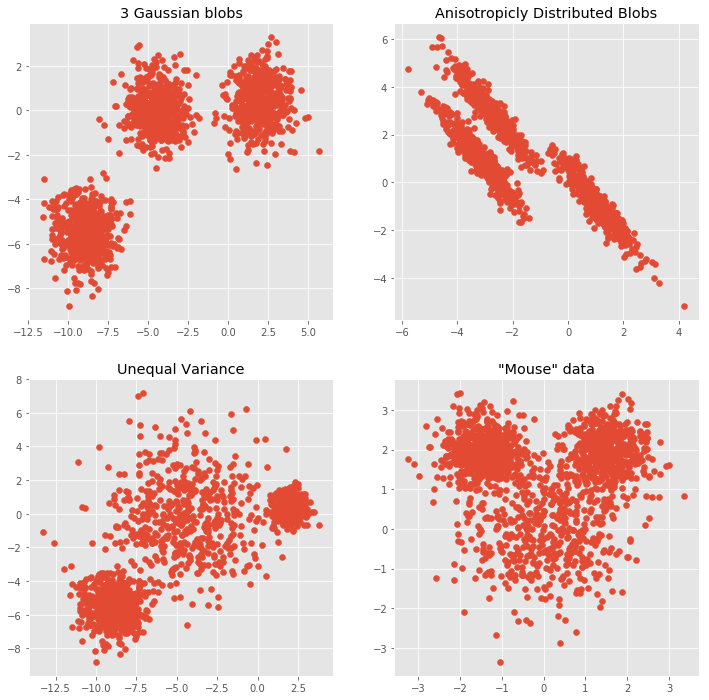

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])
plt.title("3 Gaussian blobs")
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.title("Anisotropicly Distributed Blobs")
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1])
plt.title("Unequal Variance")
plt.subplot(224)
plt.scatter(X_mouse[:, 0], X_mouse[:, 1])
plt.title("\"Mouse\" data")
plt.show()

## Clustering with the k-means algorithm

Now we will execute the k-means algorithm to perform clustering. Let us run the k-Means algorithm on three examples:

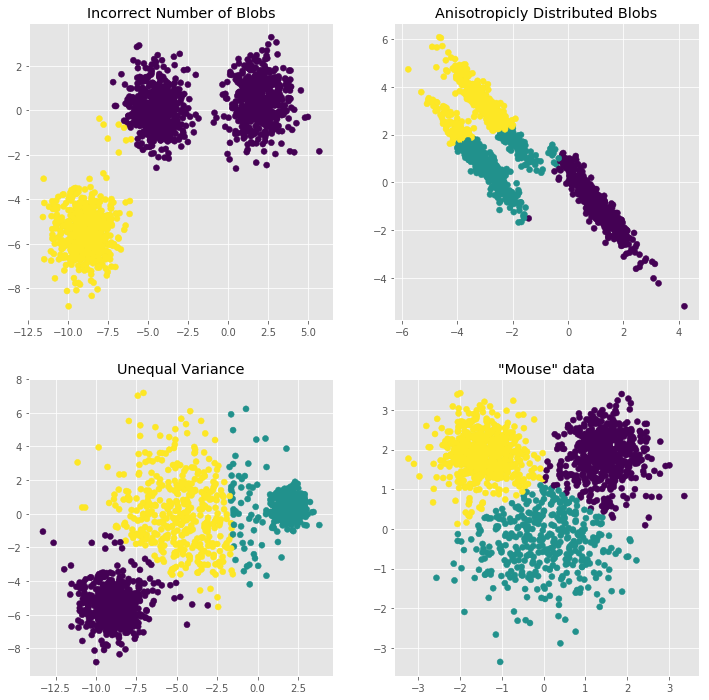

In [4]:
fig = plt.figure(figsize=(12, 12))
# Incorrect number of clusters
y_pred = KMeans(init='random', n_clusters=2).fit_predict(X)
plt.subplot(221); plt.title("Incorrect Number of Blobs")
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
y_pred_aniso = KMeans(init='random', n_clusters=3).fit_predict(X_aniso)
plt.subplot(222); plt.title("Anisotropicly Distributed Blobs")
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_aniso)
y_pred_varied = KMeans(init='random', n_clusters=3).fit_predict(X_varied)
plt.subplot(223); plt.title("Unequal Variance")
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_varied)
y_pred_mouse = KMeans(init='random', n_clusters=3).fit_predict(X_mouse)
plt.subplot(224);plt.title("\"Mouse\" data")
plt.scatter(X_mouse[:, 0], X_mouse[:, 1], c=y_pred_mouse)
plt.show()

### Determine number of clusters in the algorithm:

As we remember, one can define the metric for geometrical distance between cluster centers and the corresponding points. Let's see how for each of three examples we can determine the sum of squared error (SSE) and plot it as a function of K

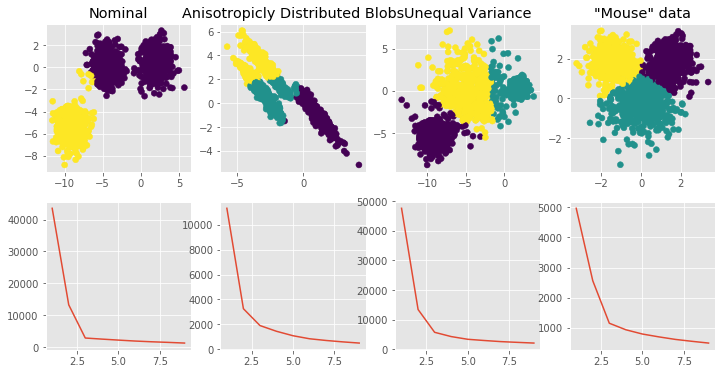

In [5]:
def getSSE(data):
    sse = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    return sse

fig = plt.figure(figsize=(12, 6))
plt.subplot(241); plt.title("Nominal")
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.subplot(242); plt.title("Anisotropicly Distributed Blobs")
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_aniso)
plt.subplot(243); plt.title("Unequal Variance")
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_varied)
plt.subplot(244); plt.title("\"Mouse\" data")
plt.scatter(X_mouse[:, 0], X_mouse[:, 1], c=y_pred_mouse)

plt.subplot(245); 
sse = getSSE(X)
plt.plot(list(sse.keys()),list(sse.values()))
plt.subplot(246); 
sse = getSSE(X_aniso)
plt.plot(list(sse.keys()),list(sse.values()))
plt.subplot(247); 
sse = getSSE(X_varied)
plt.plot(list(sse.keys()),list(sse.values()))
plt.subplot(248); 
sse = getSSE(X_mouse)
plt.plot(list(sse.keys()),list(sse.values()))
plt.show()



As we see in all cases the optimal number of clusters is 3

## Clustering with DBSCAN algorithm

Let's check the performance of the DBSCAN algorithm. we will set &#1013; and N<sub>MIN</sub>

In [6]:
epsilon = 0.3; min_samples = 10

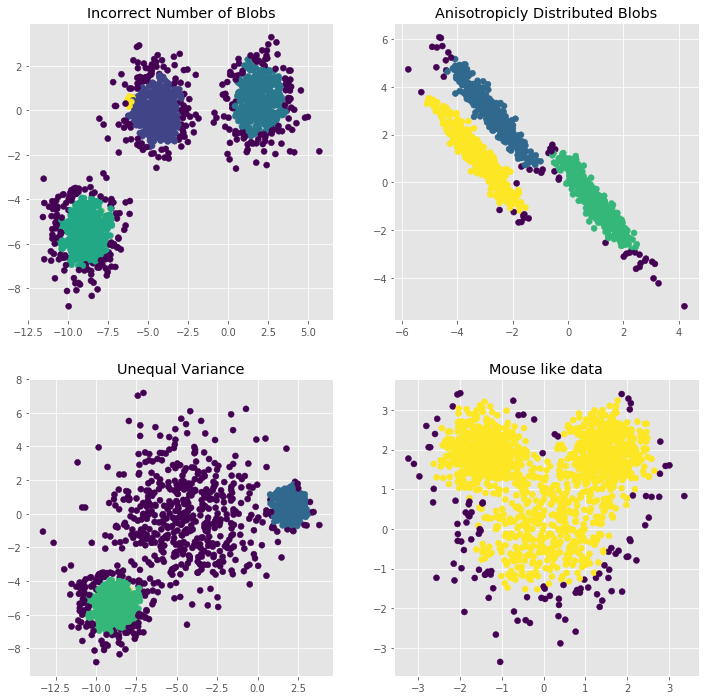

In [7]:
fig = plt.figure(figsize=(12, 12))
y_pred = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X).labels_
plt.subplot(221); plt.title("Incorrect Number of Blobs")
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
y_pred_aniso = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X_aniso).labels_
plt.subplot(222); plt.title("Anisotropicly Distributed Blobs")
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_aniso)
y_pred_varied = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X_varied).labels_
plt.subplot(223); plt.title("Unequal Variance")
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_varied)
y_pred_mouse = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X_mouse).labels_
plt.subplot(224); plt.title("Mouse like data")
plt.scatter(X_mouse[:, 0], X_mouse[:, 1], c=y_pred_mouse)
plt.show()


# Clustering with Gaussian Mixture model (GMM):

Demonstration of Gaussian mixture models performing on several different data types.

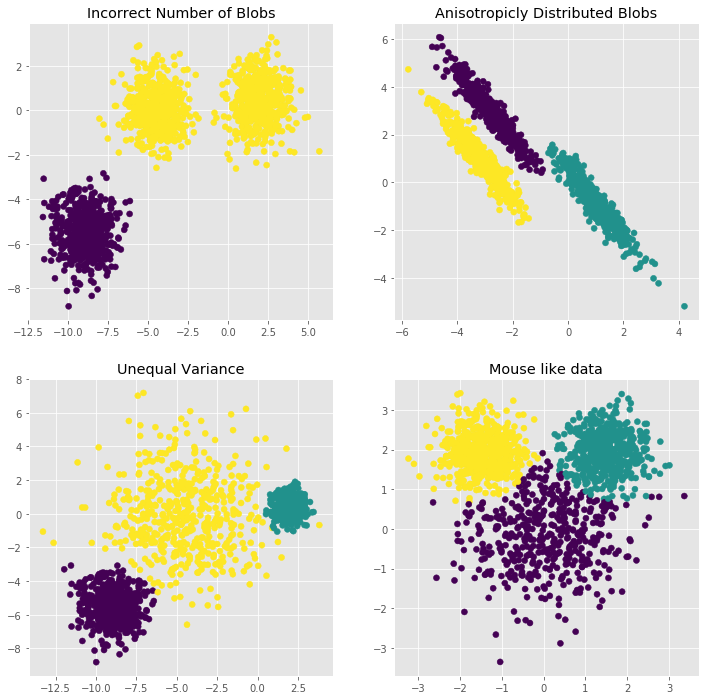

In [8]:
fig = plt.figure(figsize=(12, 12))
y_pred = GaussianMixture(n_components=2,max_iter=20).fit_predict(X)
plt.subplot(221); plt.title("Incorrect Number of Blobs")
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
y_pred = GaussianMixture(n_components=3,max_iter=20).fit_predict(X_aniso)
plt.subplot(222); plt.title("Anisotropicly Distributed Blobs")
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
y_pred = GaussianMixture(n_components=3,max_iter=20).fit_predict(X_varied)
plt.subplot(223); plt.title("Unequal Variance")
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
y_pred = GaussianMixture(n_components=3,max_iter=20).fit_predict(X_mouse)
plt.subplot(224); plt.title("Mouse like data")
plt.scatter(X_mouse[:, 0], X_mouse[:, 1], c=y_pred)
plt.show()